<a href="https://colab.research.google.com/github/alexnehc/cs661final/blob/main/cs661final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer

In [29]:
df = pd.read_csv('housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [30]:
df_cleaned = df.dropna()
df_cleaned.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# **EDAs**

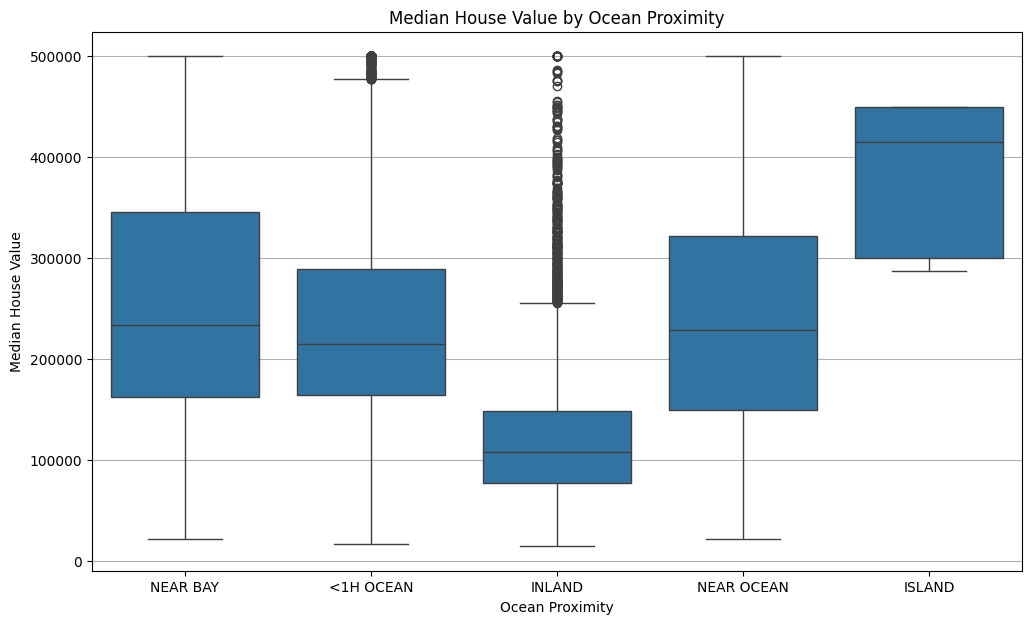

In [31]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df_cleaned)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-947240739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ocean_proximity', data=df_cleaned, palette='viridis')


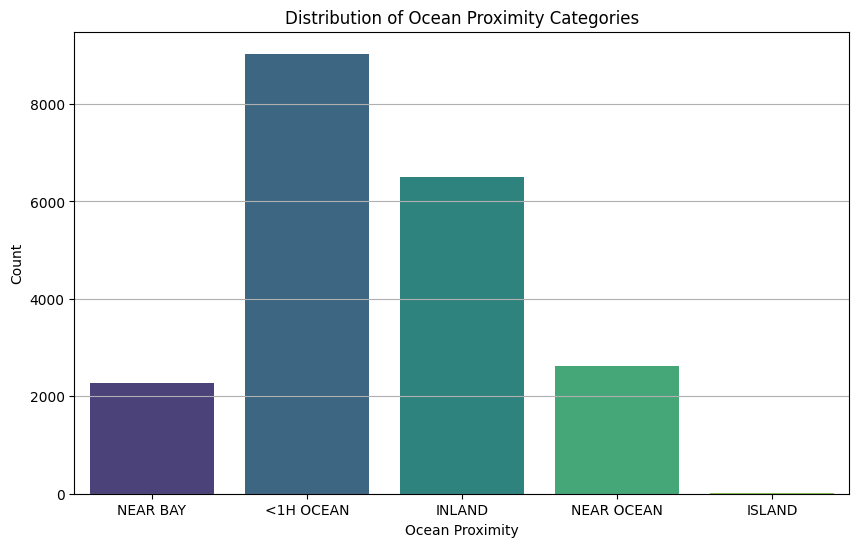

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df_cleaned, palette='viridis')
plt.title('Distribution of Ocean Proximity Categories')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

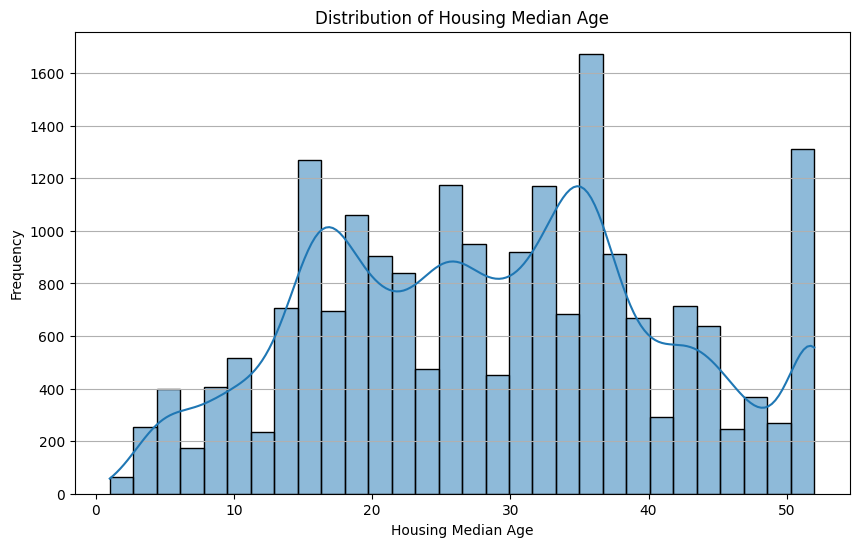

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['housing_median_age'], kde=True, bins=30)
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

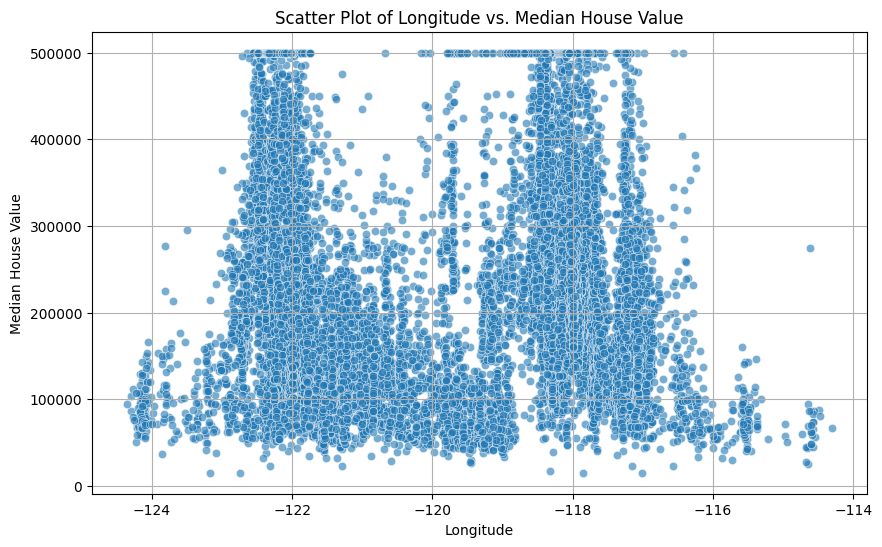

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='median_house_value', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot of Longitude vs. Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

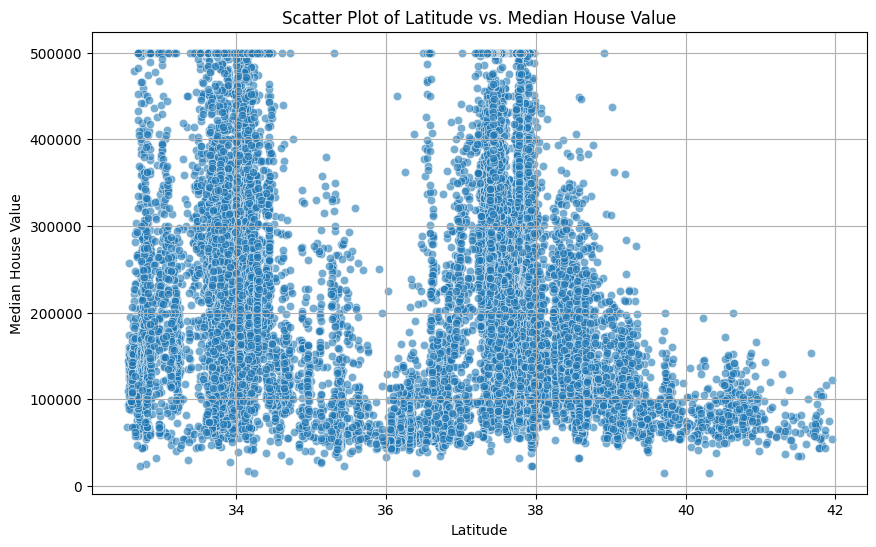

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude', y='median_house_value', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot of Latitude vs. Median House Value')
plt.xlabel('Latitude')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

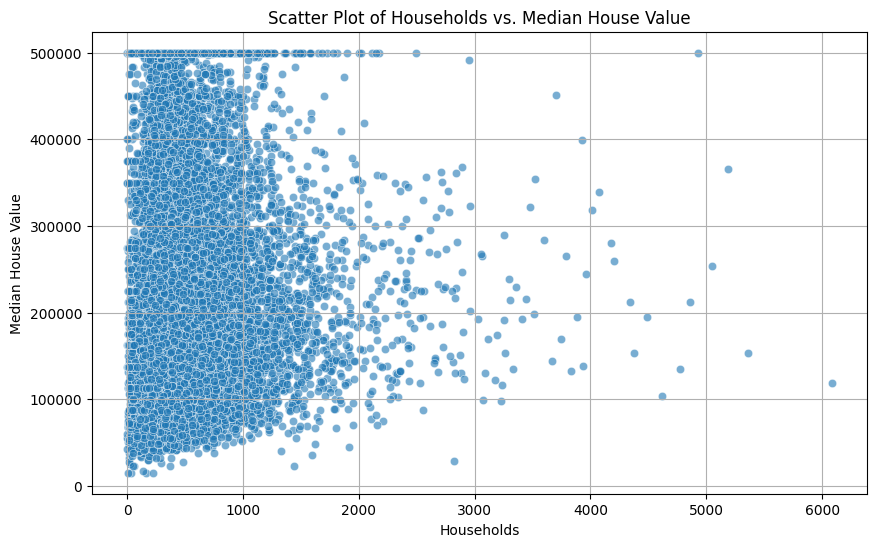

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='households', y='median_house_value', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot of Households vs. Median House Value')
plt.xlabel('Households')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

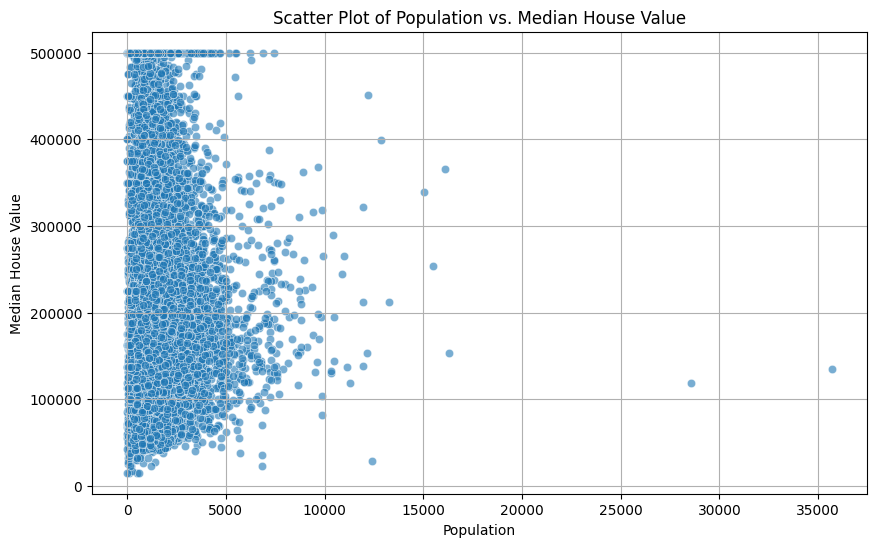

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='median_house_value', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot of Population vs. Median House Value')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

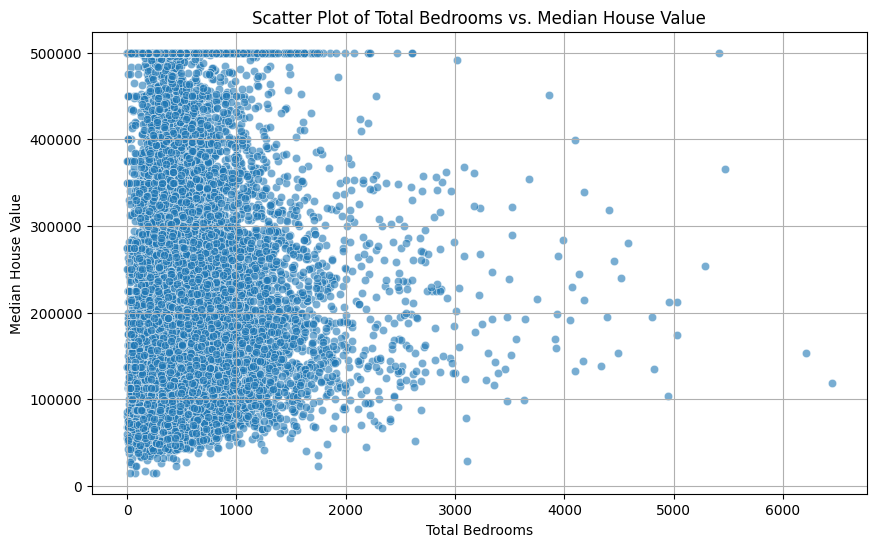

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bedrooms', y='median_house_value', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot of Total Bedrooms vs. Median House Value')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

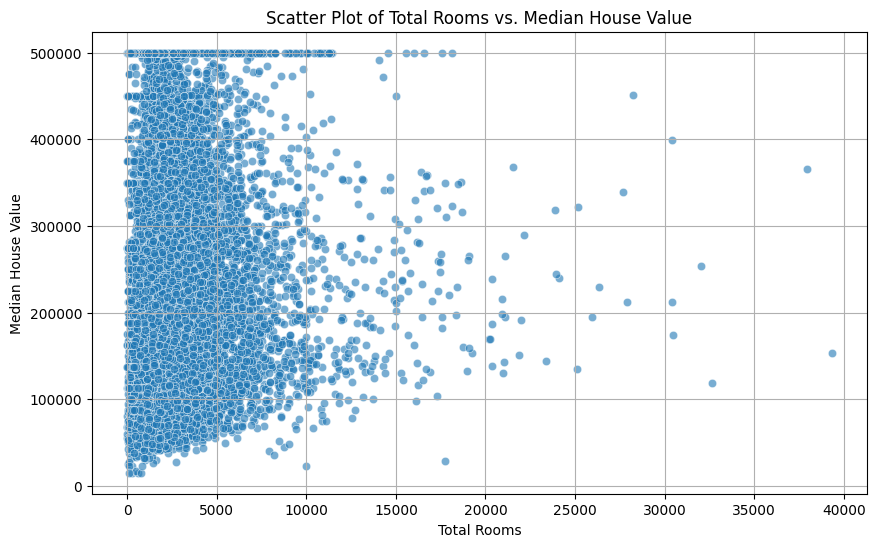

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rooms', y='median_house_value', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot of Total Rooms vs. Median House Value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

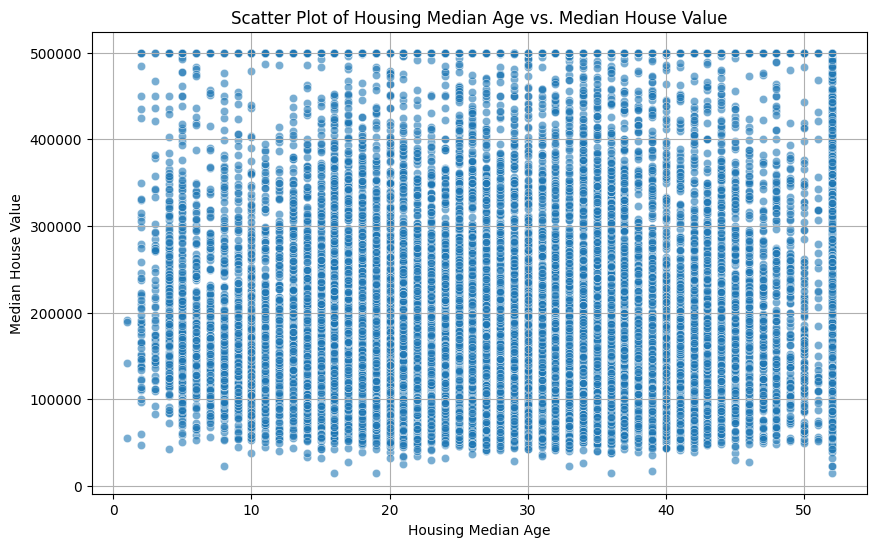

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot of Housing Median Age vs. Median House Value')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

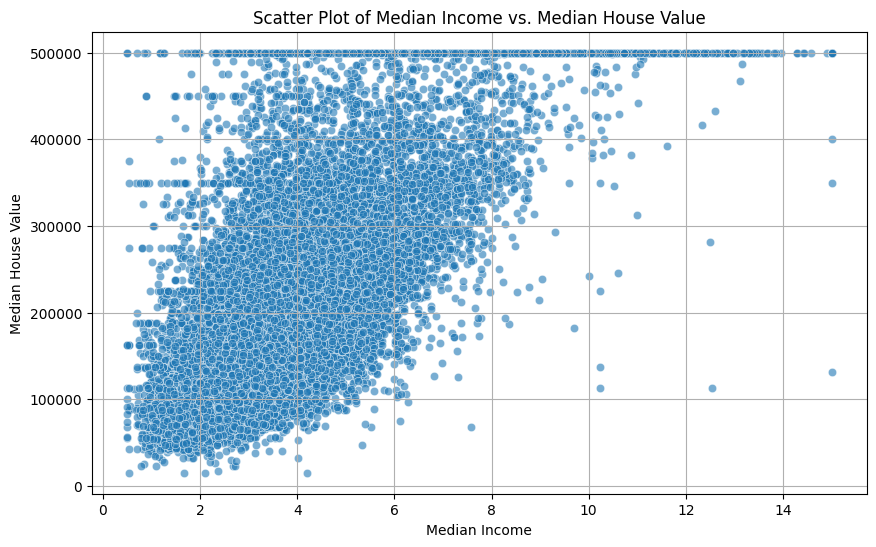

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

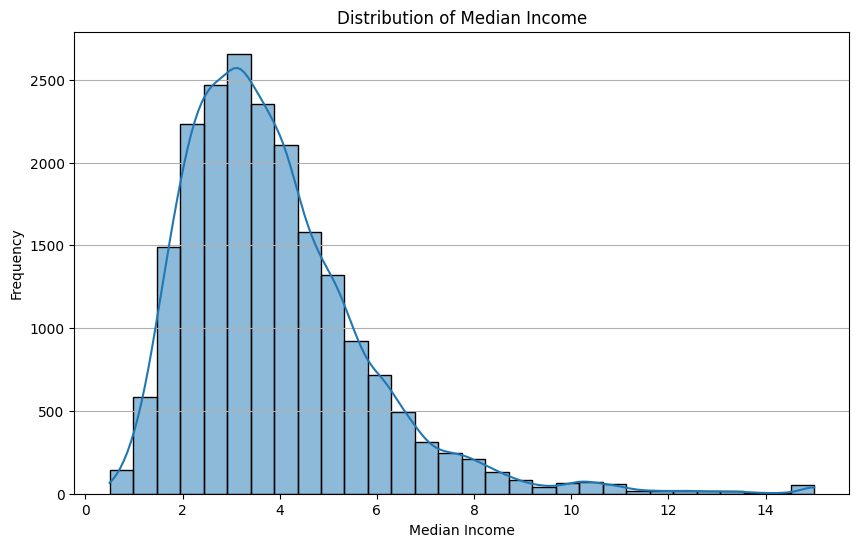

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['median_income'], kde=True, bins=30)
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

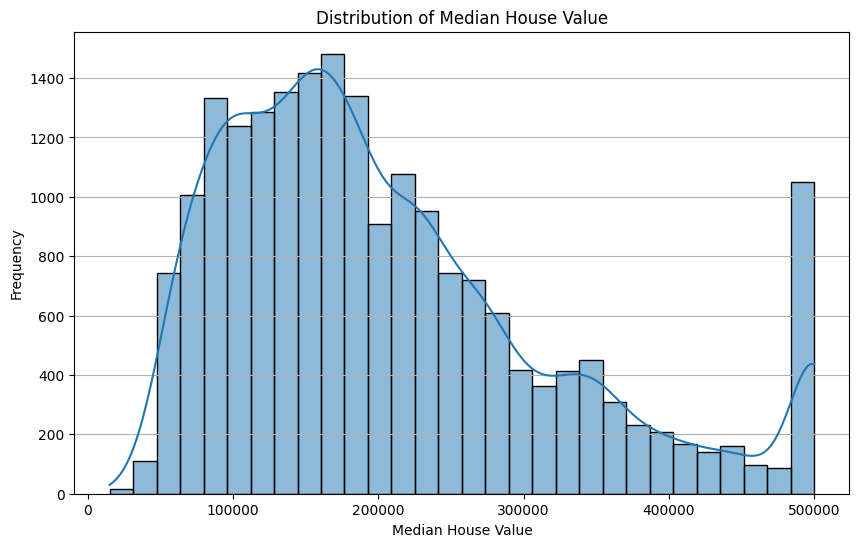

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['median_house_value'], kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

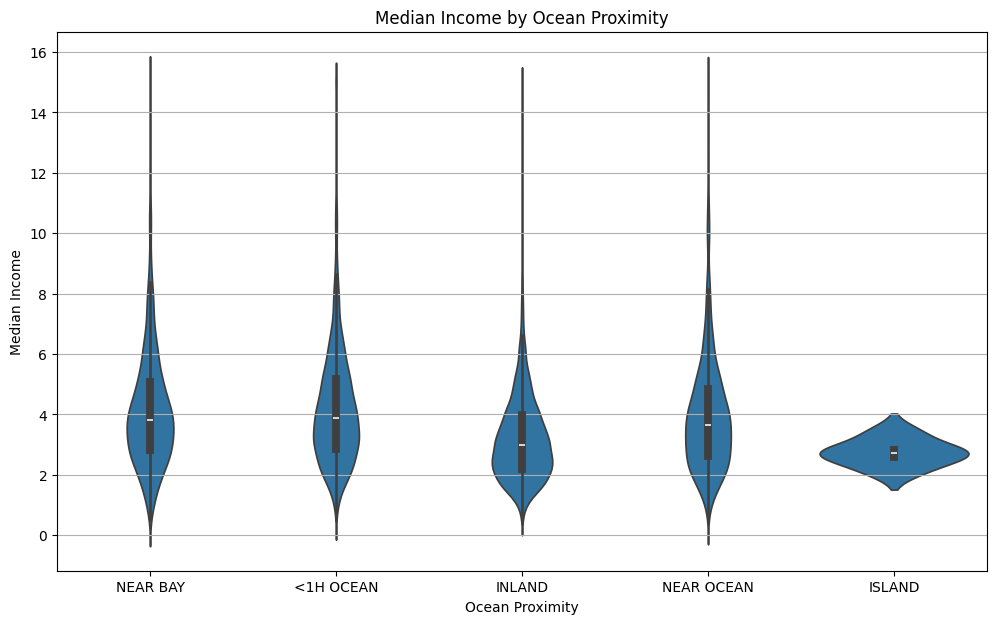

In [44]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='ocean_proximity', y='median_income', data=df_cleaned)
plt.title('Median Income by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income')
plt.grid(axis='y')
plt.show()

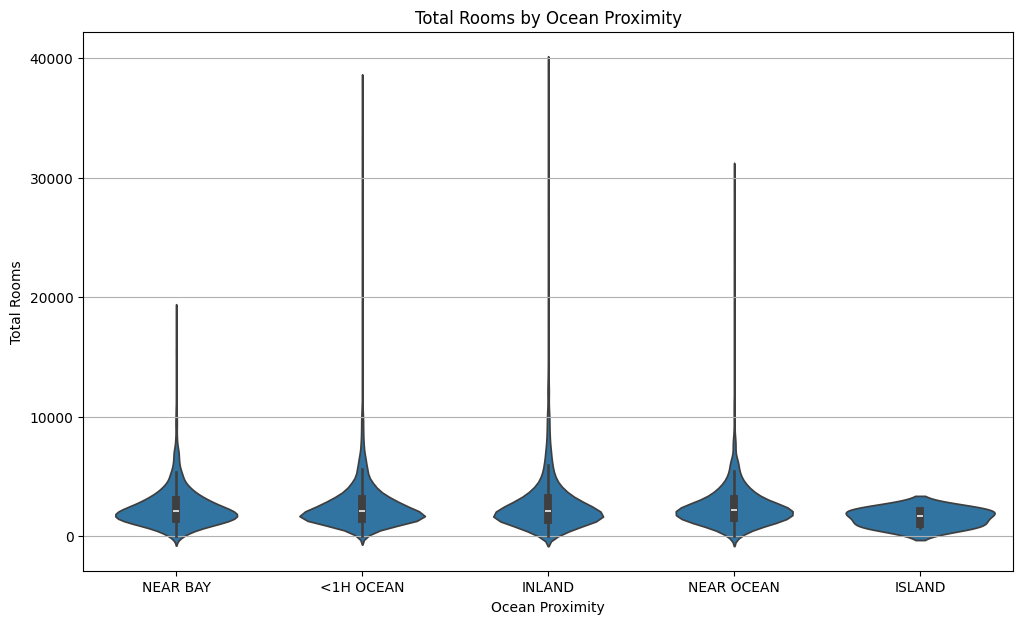

In [45]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='ocean_proximity', y='total_rooms', data=df_cleaned)
plt.title('Total Rooms by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Total Rooms')
plt.grid(axis='y')
plt.show()

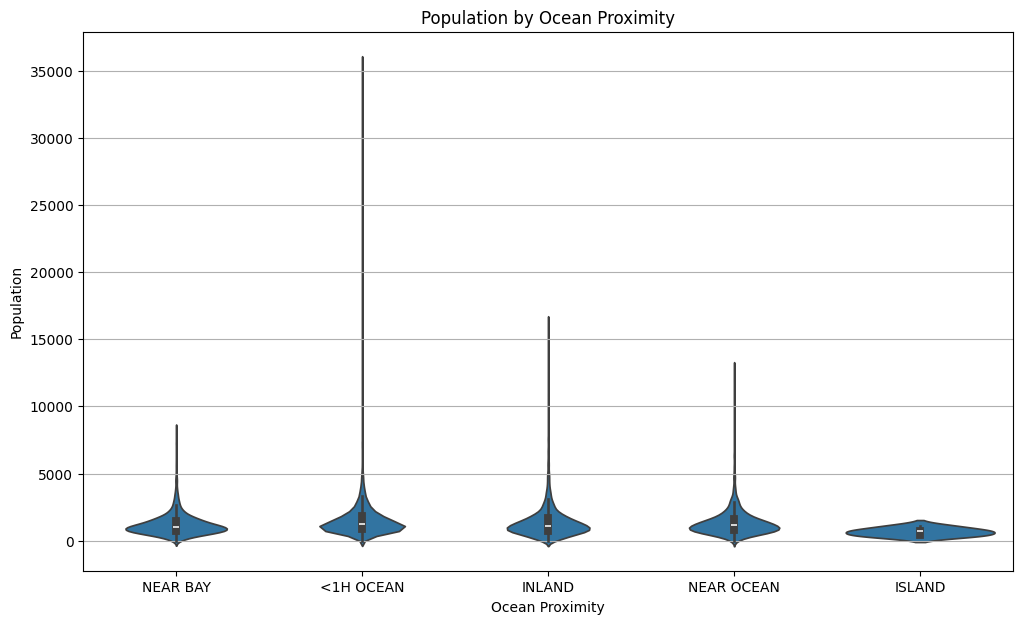

In [46]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='ocean_proximity', y='population', data=df_cleaned)
plt.title('Population by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.grid(axis='y')
plt.show()

# **Jennifer Garcia**

##**1. Linear Regression Median Income vs Median House Value**

In [47]:
X_income = df_cleaned[['median_income']]
y_house_value = df_cleaned['median_house_value']

X_train_income, X_test_income, y_train_house_value, y_test_house_value = \
    train_test_split(X_income, y_house_value, test_size=0.2, random_state=42)

income_model = LinearRegression()
income_model.fit(X_train_income, y_train_house_value)

preds_house_value = income_model.predict(X_test_income)

mse_income = mean_squared_error(y_test_house_value, preds_house_value)
r2_income = r2_score(y_test_house_value, preds_house_value)

print(f"Linear Regression (Median Income vs. Median House Value):")
print(f"  Mean Squared Error: {mse_income:.2f}")
print(f"  R-squared: {r2_income:.2f}")

Linear Regression (Median Income vs. Median House Value):
  Mean Squared Error: 7221011204.24
  R-squared: 0.47


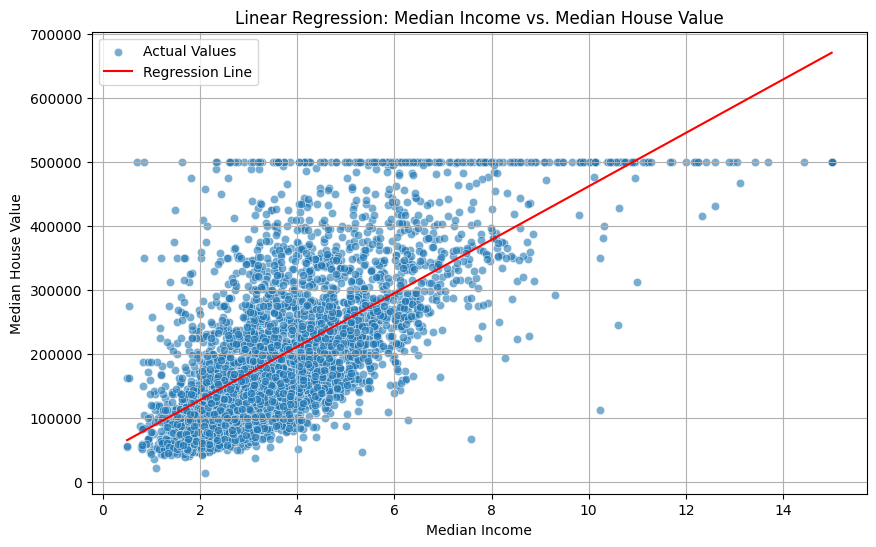

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_income['median_income'], y=y_test_house_value, label='Actual Values', alpha=0.6)
sns.lineplot(x=X_test_income['median_income'], y=preds_house_value, color='red', label='Regression Line')

plt.title('Linear Regression: Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.show()

## **2. Actual vs Predicted Scatter Plot**

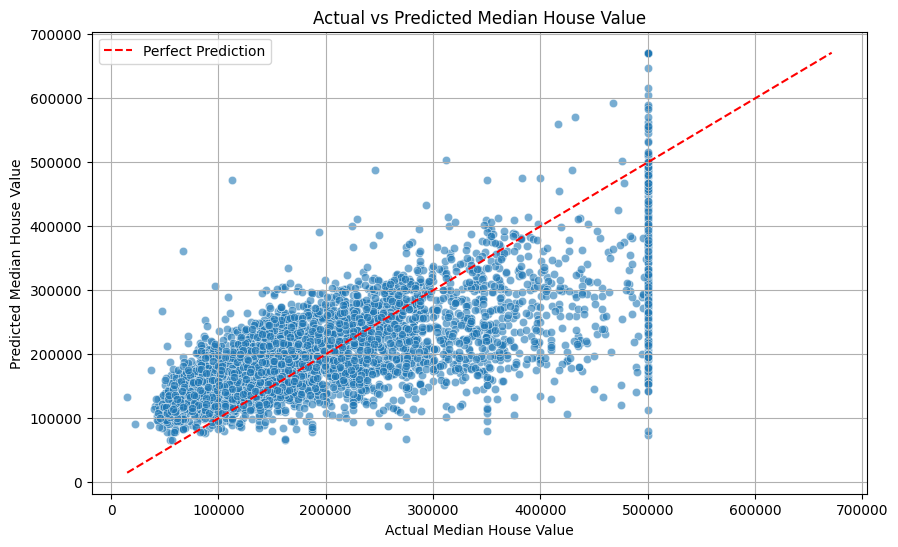

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_house_value, y=preds_house_value, alpha=0.6)
plt.title('Actual vs Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.grid(True)

# Add a line representing perfect predictions
min_val = min(y_test_house_value.min(), preds_house_value.min())
max_val = max(y_test_house_value.max(), preds_house_value.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.show()

## **3. Residuals vs Predicted Plot**

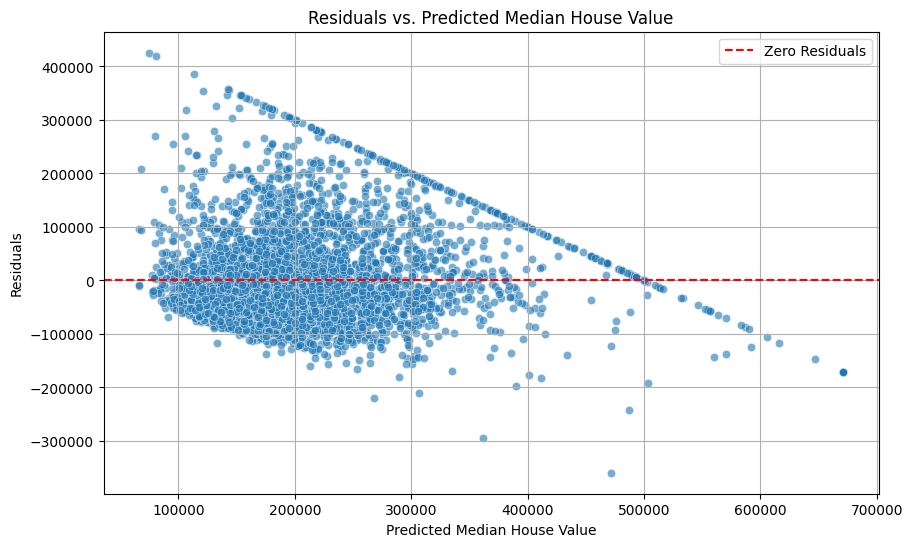

In [50]:
residuals_income = y_test_house_value - preds_house_value

plt.figure(figsize=(10, 6))
sns.scatterplot(x=preds_house_value, y=residuals_income, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals vs. Predicted Median House Value')
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

## **4. Residual Distribution**

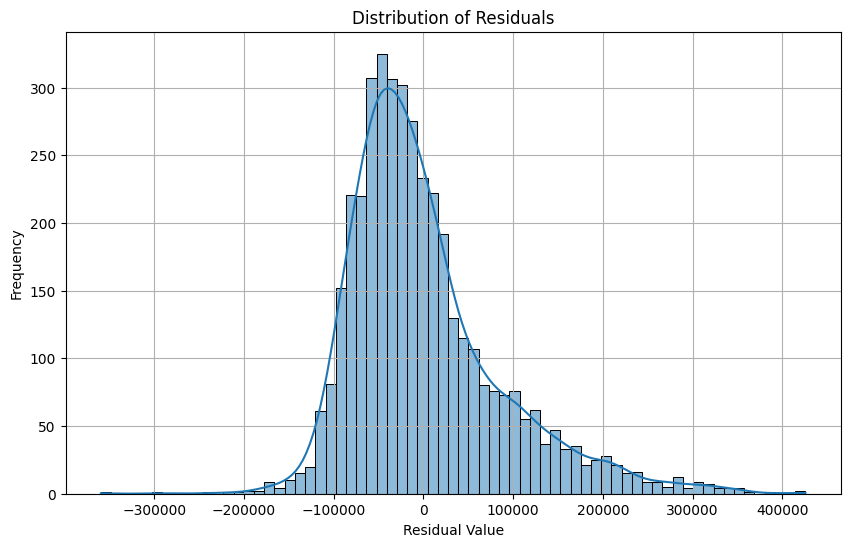

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_income, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# **Person 2**

## **5. Logistic Regression**

In [ ]:
X = df_cleaned.drop('ocean_proximity', axis=1)
y = df_cleaned['ocean_proximity']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

accuracy = accuracy_score(y_test, log_preds)
report = classification_report(y_test, log_preds)

print(f"Accuracy Score: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

## **6. Scatter Plot: Median Income vs Median House Value**

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['median_income'], y=df_cleaned['median_house_value'], alpha=0.6, color='red')

plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)

plt.show()

## **7. Scatter Plot: Longitude vs Total Rooms**

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['longitude'], y=df_cleaned['total_rooms'], alpha=0.6, color='red')

plt.title('Scatter Plot of Longitude vs. Total Rooms')
plt.xlabel('Longitude')
plt.ylabel('Total Rooms')
plt.grid(True)
plt.show()

## **8. Scatter Plot: Latitude vs Median House Value**

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['latitude'], y=df_cleaned['median_house_value'], alpha=0.6, color='red')

plt.title('Scatter Plot of Latitude vs. Median House Value')
plt.xlabel('Latitude')
plt.ylabel('Median House Value')
plt.grid(True)

plt.show()

# **Person 3**

## **9. Decision Tree**

In [ ]:
X_dt = df_cleaned.drop('ocean_proximity', axis=1)
y_dt = df_cleaned['ocean_proximity']

X_dt = pd.get_dummies(X_dt, drop_first=True)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_dt, y_train_dt)

decision_tree_preds = decision_tree_model.predict(X_test_dt)

accuracy_dt = accuracy_score(y_test_dt, decision_tree_preds)
report_dt = classification_report(y_test_dt, decision_tree_preds)

print(f"Decision Tree Accuracy Score: {accuracy_dt:.2f}")
print("\nDecision Tree Classification Report:")
print(report_dt)

plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, feature_names=X_dt.columns, class_names=decision_tree_model.classes_, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Classifier")
plt.show()

In [ ]:
X_dt_new = df_cleaned.drop('ocean_proximity', axis=1)
y_dt_new = df_cleaned['ocean_proximity']

X_dt_new = pd.get_dummies(X_dt_new, drop_first=True)


X_train_dt_new, X_test_dt_new, y_train_dt_new, y_test_dt_new = \
    train_test_split(X_dt_new, y_dt_new, test_size=0.2, random_state=42)

decision_tree_model_new = DecisionTreeClassifier(random_state=42, max_depth=4)
decision_tree_model_new.fit(X_train_dt_new, y_train_dt_new)


decision_tree_preds_new = decision_tree_model_new.predict(X_test_dt_new)


accuracy_dt_new = accuracy_score(y_test_dt_new, decision_tree_preds_new)
report_dt_new = classification_report(y_test_dt_new, decision_tree_preds_new)

print(f"New Decision Tree Accuracy Score (max_depth=4): {accuracy_dt_new:.2f}")
print("\nNew Decision Tree Classification Report (max_depth=4):")
print(report_dt_new)

plt.figure(figsize=(20,10))
plot_tree(decision_tree_model_new, feature_names=X_dt_new.columns, class_names=decision_tree_model_new.classes_, filled=True, rounded=True, fontsize=8)
plt.title("New Decision Tree Classifier (max_depth=4)")
plt.show()

## **10. Geographic Scatter Plot (Latitude vs Longitude, colored by price)**

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value',
                data=df_cleaned, palette='viridis', alpha=0.8)

plt.title('Geographic Scatter Plot: Latitude vs. Longitude (Colored by Median House Value)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## **11. Box Plot (Median Income)**

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_cleaned['median_income'])

plt.title('Box Plot of Median Income')
plt.ylabel('Median Income')
plt.grid(True)
plt.show()

## **12.Box Plot (Median House Value)**

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_cleaned['median_house_value'])

plt.title('Box Plot of Median House Value')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

# **Person 4**

## **13. Random Forest**

In [ ]:
X_rf = df_cleaned.drop('ocean_proximity', axis=1)
y_rf = df_cleaned['ocean_proximity']

X_rf = pd.get_dummies(X_rf, drop_first=True)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_rf, y_train_rf)

random_forest_preds = random_forest_model.predict(X_test_rf)

accuracy_rf = accuracy_score(y_test_rf, random_forest_preds)
report_rf = classification_report(y_test_rf, random_forest_preds)

print(f"Random Forest Accuracy Score: {accuracy_rf:.2f}")
print("\nRandom Forest Classification Report:")
print(report_rf)

In [ ]:
cm_rf = confusion_matrix(y_test_rf, random_forest_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest_model.classes_)

fig_rf, ax_rf = plt.subplots(figsize=(10, 8))
disp_rf.plot(cmap=plt.cm.Blues, ax=ax_rf)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()

## **14. Feature Importance Bar Chart**

In [ ]:
feature_importances = random_forest_model.feature_importances_
feature_names = X_rf.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

## **15. ROC Curve (One-vs-Rest)**

In [ ]:

y_pred_proba_rf = random_forest_model.predict_proba(X_test_rf)

label_binarizer = LabelBinarizer()
y_test_binarized = label_binarizer.fit_transform(y_test_rf)
classes = label_binarizer.classes_

plt.figure(figsize=(10, 8))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {classes[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest) for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## **16. Predicted Class Probability Distribution**


In [ ]:
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(classes):
    sns.histplot(y_pred_proba_rf[:, i], bins=30, kde=True, label=f'Class: {class_name}', alpha=0.5)

plt.title('Predicted Class Probability Distribution for Random Forest Classifier')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()